In [3]:



def find_coq_files(repo_path) :
    coq_files = [ ]
    for root , dirs , files in os.walk(repo_path) :
        for file in files :
            if file.endswith('.v') :
                coq_files.append(os.path.join(root , file))
    return coq_files


def extract_imports(file_path) :
    imports = [ ]
    with open(file_path , 'r') as file :
        content = file.read( )
        import_pattern = r'Require\s+(Import|Export)\s+([A-Za-z0-9_]+)'
        matches = re.findall(import_pattern , content)
        imports = [ match[ 1 ] for match in matches ]
    return imports


def create_import_graph(repo_path) :
    coq_files = find_coq_files(repo_path)
    graph = nx.DiGraph( )

    for file_path in coq_files :
        file_name = os.path.basename(file_path)
        module_name = os.path.splitext(file_name)[ 0 ]
        graph.add_node(module_name)

        imports = extract_imports(file_path)
        for import_module in imports :
            graph.add_edge(module_name , import_module)

    return graph


def visualize_graph(graph) :
    plt.figure(figsize=(16 , 12))
    plt.margins(x=0.1 , y=0.1)

    pos = nx.spring_layout(graph , k=0.9 , iterations=50)
    nx.draw(graph , pos , with_labels=True , node_color='lightblue' ,
            node_size=3000 , font_size=8 , font_weight='bold' ,
            arrows=True , edge_color='gray' , arrowsize=20)

    labels = nx.get_node_attributes(graph , 'name')
    nx.draw_networkx_labels(graph , pos , labels , font_size=8)

    plt.title("Coq Import Graph" , fontsize=16)
    plt.axis('off')
    plt.show( )


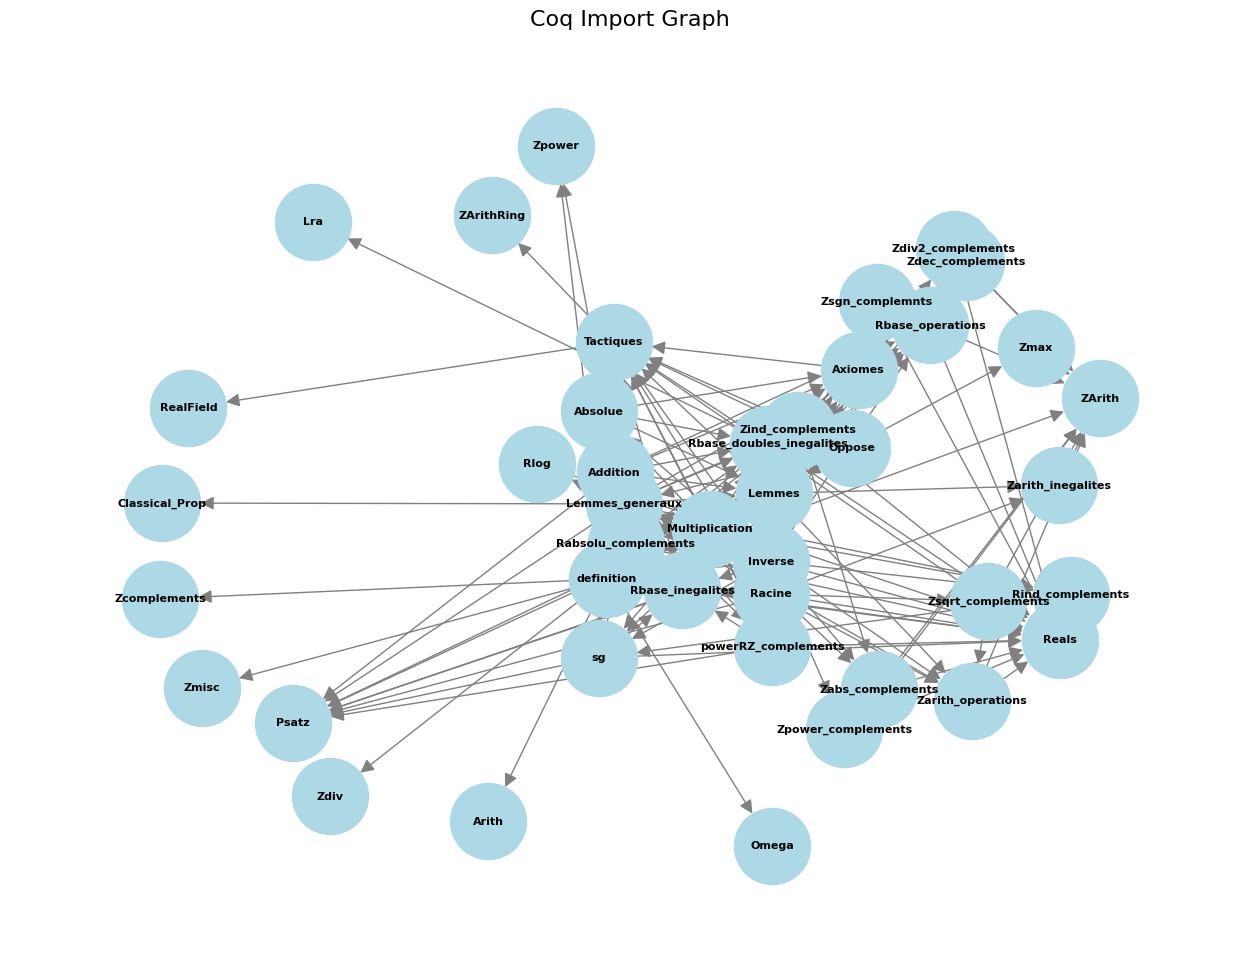

In [5]:
# Main execution
repo_path = '/Users/jonathansuru/PycharmProjects/StarCOQ/dataset/community_repo/coq-community-exact-real-arithmetic-43bf40b'  # Replace with the actual path to your Coq repository
import_graph = create_import_graph(repo_path)
visualize_graph(import_graph)

In [7]:



def create_import_graph_and_list(repo_path) :
    coq_files = find_coq_files(repo_path)
    graph = nx.DiGraph( )
    import_dict = defaultdict(list)

    for file_path in coq_files :
        module_name = os.path.splitext(os.path.basename(file_path))[ 0 ]
        graph.add_node(module_name)

        imports = extract_imports(file_path)
        import_dict[ module_name ] = imports

        for import_module in imports :
            graph.add_edge(module_name , import_module)

    return graph , import_dict

In [8]:
def print_import_list(import_dict) :
    for module , imports in import_dict.items( ) :
        print(f"{module}:")
        for imp in imports :
            print(f"  - {imp}")
        print( )  # Empty line for readability


def save_import_list(import_dict , output_file) :
    with open(output_file , 'w') as f :
        for module , imports in import_dict.items( ) :
            f.write(f"{module}:\n")
            for imp in imports :
                f.write(f"  - {imp}\n")
            f.write("\n")  # Empty line for readability


In [9]:
import_graph , import_list = create_import_graph_and_list(repo_path)

In [10]:
# Print the import list
print_import_list(import_list)

Rbase_operations:
  - Reals

Zind_complements:
  - Reals
  - Zdec_complements
  - definition
  - Zabs_complements
  - Tactiques

Zmax:
  - ZArith

Racine:
  - definition
  - Reals
  - Zind_complements
  - Tactiques
  - Psatz
  - Lemmes
  - Zsqrt_complements
  - Rbase_inegalites
  - Lemmes_generaux
  - Rbase_doubles_inegalites
  - Zarith_inegalites
  - Zarith_operations
  - powerRZ_complements
  - Inverse

Axiomes:
  - definition
  - Tactiques
  - Rbase_doubles_inegalites

Rbase_inegalites:
  - Reals
  - Psatz
  - Tactiques
  - Rbase_operations

Zpower_complements:
  - ZArith
  - Reals

Lemmes_generaux:
  - definition
  - Psatz
  - Tactiques
  - Axiomes
  - Rbase_doubles_inegalites
  - Rlog
  - Zind_complements
  - Rbase_inegalites
  - powerRZ_complements
  - Absolue
  - Zpower
  - Zarith_operations
  - sg
  - Lemmes
  - Rind_complements
  - Classical_Prop

Addition:
  - definition
  - Tactiques
  - Axiomes
  - Lemmes_generaux
  - Lemmes
  - Psatz
  - powerRZ_complements
  - Rbase_opera

In [24]:
from utils import check_theorem_proof

check_theorem_proof("Theorem example : 2 + 2 = 5." , "Proof. reflexivity. Qed.")

Unable to determine if the proof is correct:
Welcome to Coq 8.19.2
1 goal
  
  2 + 2 = 5


Coq < 
example < 
Toplevel input, characters 7-18:
> Proof. reflexivity.
>        ^^^^^^^^^^^
Error: Unable to unify "5" with "2 + 2".

Toplevel input, characters 49-53:
Error:  (in proof example): Attempt to save an incomplete proof





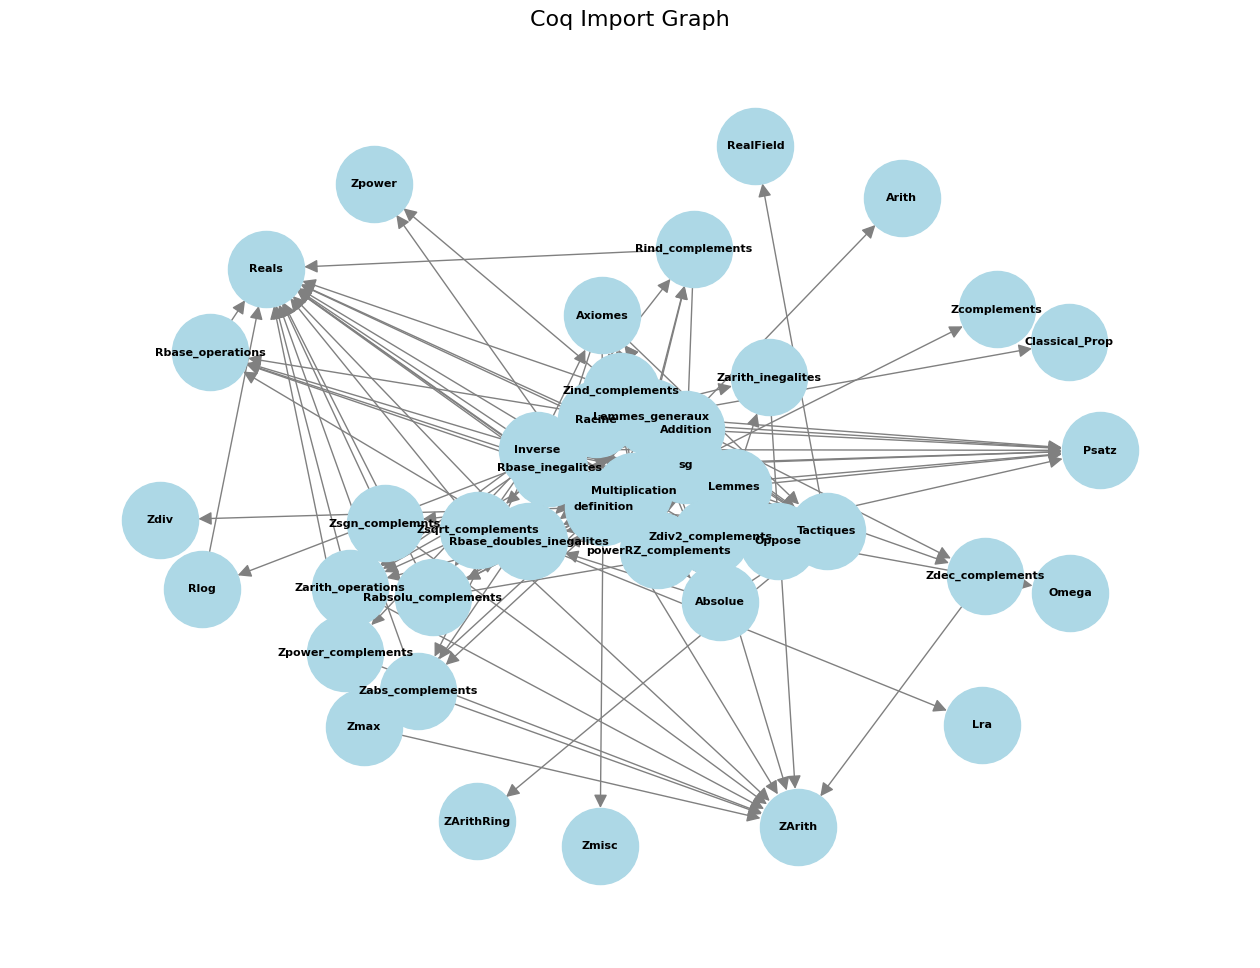

Created shared file for Rbase_operations:  /Rbase_operations_shared.v
Created shared file for Zind_complements:  /Zind_complements_shared.v
Created shared file for Zdec_complements:  /Zdec_complements_shared.v
Created shared file for definition:  /definition_shared.v
Created shared file for Zabs_complements:  /Zabs_complements_shared.v
Created shared file for Tactiques:  /Tactiques_shared.v
Created shared file for Zmax:  /Zmax_shared.v
Created shared file for Racine:  /Racine_shared.v
Created shared file for Lemmes:  /Lemmes_shared.v
Created shared file for Zsqrt_complements:  /Zsqrt_complements_shared.v
Created shared file for Rbase_inegalites:  /Rbase_inegalites_shared.v
Created shared file for Lemmes_generaux:  /Lemmes_generaux_shared.v
Created shared file for Rbase_doubles_inegalites:  /Rbase_doubles_inegalites_shared.v
Created shared file for Zarith_inegalites:  /Zarith_inegalites_shared.v
Created shared file for Zarith_operations:  /Zarith_operations_shared.v
Created shared file 

In [31]:
import os
import re
import networkx as nx
import matplotlib.pyplot as plt


def find_coq_files(repo_path) :
    coq_files = { }
    for root , dirs , files in os.walk(repo_path) :
        for file in files :
            if file.endswith('.v') :
                module_name = os.path.splitext(file)[ 0 ]
                coq_files[ module_name ] = os.path.join(root , file)
    return coq_files


def extract_imports(content) :
    import_pattern = r'Require\s+(Import|Export)\s+([A-Za-z0-9_]+)'
    matches = re.findall(import_pattern , content)
    return [ match[ 1 ] for match in matches ]


def create_import_graph(coq_files) :
    graph = nx.DiGraph( )
    for module , file_path in coq_files.items( ) :
        graph.add_node(module , file_path=file_path)
        with open(file_path , 'r') as file :
            content = file.read( )
        imports = extract_imports(content)
        for import_module in imports :
            graph.add_edge(module , import_module)
    return graph


def visualize_graph(graph) :
    plt.figure(figsize=(16 , 12))
    plt.margins(x=0.1 , y=0.1)
    pos = nx.spring_layout(graph , k=0.9 , iterations=50)
    nx.draw(graph , pos , with_labels=True , node_color='lightblue' ,
            node_size=3000 , font_size=8 , font_weight='bold' ,
            arrows=True , edge_color='gray' , arrowsize=20)
    plt.title("Coq Import Graph" , fontsize=16)
    plt.axis('off')
    plt.show( )


def replace_dependencies(graph , module , coq_files , visited=None) :
    if visited is None :
        visited = set( )

    if module in visited :
        return f"(* Circular dependency detected: {module} *)"

    visited.add(module)

    if module not in coq_files :
        return f"(* External module: {module} *)"

    with open(coq_files[ module ] , 'r') as file :
        content = file.read( )

    imports = extract_imports(content)
    for import_module in imports :
        import_content = replace_dependencies(graph , import_module , coq_files , visited.copy( ))
        content = content.replace(f"Require Import {import_module}." , import_content)

    return content


def create_shared_files(graph , coq_files , output_dir) :
    os.makedirs(output_dir , exist_ok=True)
    for module in graph.nodes( ) :
        if module in coq_files :
            shared_content = replace_dependencies(graph , module , coq_files)
            output_file = os.path.join(output_dir , f"{module}_shared.v")
            with open(output_file , 'w') as f :
                f.write(shared_content)
            print(f"Created shared file for {module}: {output_file}")


# Main execution
repo_path = '/Users/jonathansuru/PycharmProjects/StarCOQ/dataset/community_repo/coq-community-exact-real-arithmetic-43bf40b'  # Replace with the actual path to your Coq repository
output_dir = ' '  # Replace with the desired output directory

coq_files = find_coq_files(repo_path)
import_graph = create_import_graph(coq_files)

# Visualize the graph
visualize_graph(import_graph)

# Create shared files
create_shared_files(import_graph , coq_files , output_dir)

In [ ]:
repo_path = '/Users/jonathansuru/PycharmProjects/StarCOQ/dataset/community_repo/coq-community-exact-real-arithmetic-43bf40b'  # Replace with the actual path to your Coq repository
